In [13]:
import numpy as np
from graphviz import Graph, Digraph

## 隣接行列を使った最小コスト経路の探索

In [14]:
##  既知情報 ##
node_num = 5
edge_num = 6
## 隣接行列
vertics = np.array([[0, 1, 1, 0, 0],   #0
                                  [1, 0, 0, 1, 0],   #1
                                  [1, 0, 0, 1, 1],   #2
                                  [0, 1, 1, 0, 1],   #3
                                  [0, 0, 1, 1, 0]]) #4

weight  = np.array([[  0,   6,   5,   0,    0],     #0
                                   [  6,   0,   0,   6,    0],    #1
                                   [  5,   0,   0, 10, 10],    #2
                                   [  0,   6, 10,   0,    7],   #3
                                   [  0,   0, 10,   7,    0]]) #4
## 探索条件
con_start = 0
con_goal  = 3
con_allow_cost = 13

In [15]:
## 便利関数 ##
## 配列(ver)を渡せば、対応するノードの番号を返す
def getVerBoolian(ver):
    path = []
    for i, ver_bool in enumerate(ver):
        if bool(ver_bool):
            path.append(i)
    return path

## startからgoalまでのコストをweight配列を参照して返す
def getCost(start, goal, targetWeight=weight):
    return targetWeight[start][goal]

## 任意のノードと接続してるノードとのコストを返す(verticsと同じ並び順)
def getConnectedNodesCost(node_num, val=0, targetWeight=weight):
    return (targetWeight[node_num][targetWeight[node_num]!=val]).tolist()

#print(getVerBoolian(vertics[0]))
#print(getConnectedNodesCost(0))
#print(getCost(0, 1))

In [16]:
## グラフ構造のヴィジュアライズ
graph = Graph(format='png', engine='fdp')

## ノードの作成
for i in range(node_num):
    if i == con_start:
        graph.attr("node", shape='circle', color="green", fontcolor="green")
    elif i == con_goal:
        graph.attr("node", shape='circle', color="red", fontcolor="red")
    else:
        graph.attr("node", shape='circle', color="black", fontcolor="black")
    graph.node(str(i))

## エッジの作成
for i in range(node_num):
    for j in getVerBoolian(vertics[i]):
        cost = getCost(i, j)
        graph.edge(str(i), str(j), label=str(getCost(i, j)))
        #print(i, j)

#graph.render("ngraphs")
#display(graph)

In [17]:
## 探索
for node in np.where(vertics[con_start]==1)[0]:
    if (node != con_start) and (node != con_goal):
        total_cost = getCost(con_start, node) + getCost(node, con_goal)
        if total_cost <= con_allow_cost:
            print("Conditions met : {0} -> {1} -> {2}, total {3}".format(con_start, node, con_goal, total_cost))

Conditions met : 0 -> 1 -> 3, total 12


## 隣接リストを使った最小コスト経路の探索

In [6]:
## 構造体の作成(class)
class Node:
    def __init__(self, to, weight):
        self.to = to
        self.size = len(self.to)
        self.weight = weight

In [7]:
## 隣接行列->隣接リスト
graph = []
for i in range(node_num):
    to         = getVerBoolian(vertics[i])
    weight = getConnectedNodesCost(i)
    
    nd = Node(to, weight)
    print(i, nd.to, nd.weight)
    graph.append(nd)
graph

0 [1, 2] [6, 5]
1 [0, 3] [6, 6]
2 [0, 3, 4] [5, 10, 10]
3 [1, 2, 4] [6, 10, 7]
4 [2, 3] [10, 7]


In [8]:
## 探索
for i, inside in enumerate(graph[con_start].to):
    goal_index = np.where(np.array(graph[inside].to)==con_goal)[0][0]
    total_cost = graph[con_start].weight[i] + graph[inside].weight[goal_index]
    if total_cost <= con_allow_cost:
        print("Conditions met : {0} -> {1} -> {2}, total {3}".format(con_start, inside, con_goal, total_cost))

Conditions met : 0 -> 1 -> 3, total 12


## 深さ優先探索

In [31]:
##  既知情報  ##
node_num = 15
edge_num = 14

edges = [(0, 1), (1, 2), (1, 3),
                 (0, 4), (4, 5), (5, 6), (5, 7), (4, 8), (8, 9), (8, 10),
                 (0, 11), (11, 12), (11, 13), (13, 14)]
np_edges = np.array(edges)

## 探索条件
con_start = 0
con_goal = 14

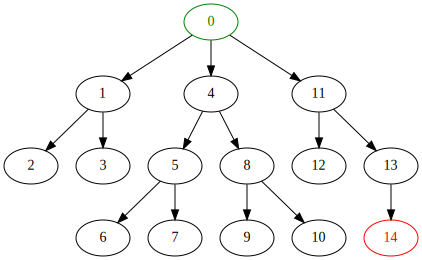

In [10]:
## グラフ構造のヴィジュアライズ
graph = Digraph(format='png')

## ノードの作成
for i in range(node_num):
    if i == con_start:
        graph.attr("node", color="green", fontcolor="green")
    elif i == con_goal:
        graph.attr("node", color="red", fontcolor="red")
    else:
        graph.attr("node", color="black", fontcolor="black")
    graph.node(str(i))

## エッジの作成
for i, j in edges:
    graph.edge(str(i), str(j))

graph.render("tree")
display(graph)

In [40]:
## Nodeクラスを改造

##~~status(str)~~
##white:未訪問
##gray:訪問済みだが、隣接する頂点を調べ終わっていない
##black:訪問済みで、隣接する頂点も全て調べた
class Node:
    def __init__(self, to, weight="1", status="white"):
        self.to = to
        self.weight = weight
        self.status = status

In [54]:
#ノードリストの作成
nodes = []
for i in range(node_num):
    matched_indexes = np.where(np_edges[:,0]==i)
    element = np_edges[matched_indexes][:,1]
    
    nd = Node(element,  weight="1", status="white")
    nodes.append(nd)
nodes

In [73]:
#initialization
stack = nodes[con_start].to.tolist()

In [74]:
stack

[1, 4, 11]

In [ ]:
while True:
    poped_num = stack.pop()
    color = nodes[poped_num].status
    if color == "white":
        stack.append(node[poped_num].to)
        continue
    elif color == "gray":
        pass
    elif color == "black":
        pass